# Demond Forecasts for HERON datasets

## HERON HQ Parking

### Load data

In [279]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


In [280]:
ts60 = pd.read_csv('EVB-P1840070_Heron_HQ_Parking_mean_demand_20210102_to_20211013_60min.csv', index_col=0, parse_dates=True)


ts60.shape

(6817, 1)

In [281]:
features60 = pd.read_csv('EVB-P1840070_Heron_HQ_Parking_mean_demand_20210102_to_20211013_60min_time_covariates.csv', index_col=0, parse_dates=True)

In [282]:
features60.shape

(6817, 11)

In [283]:
df60 = ts60.join(features60)

In [284]:
df60.head()
df60.tail()

,Total Demand (kw),year,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,dayofweek,dayofyear,week,holidays
2021-10-12 20:00:00,7.251799e-02,2021.0,-0.866025,0.5,0.0,1.0,-0.866025,0.500000,1.0,285.0,41.0,0.0
2021-10-12 21:00:00,2.273737e-13,2021.0,-0.866025,0.5,0.0,1.0,-0.707107,0.707107,1.0,285.0,41.0,0.0
2021-10-12 22:00:00,2.273737e-13,2021.0,-0.866025,0.5,0.0,1.0,-0.500000,0.866025,1.0,285.0,41.0,0.0
2021-10-12 23:00:00,2.273737e-13,2021.0,-0.866025,0.5,0.0,1.0,-0.258819,0.965926,1.0,285.0,41.0,0.0
2021-10-13 00:00:00,-6.809524e-02,2021.0,-0.866025,0.5,0.0,1.0,0.000000,1.000000,2.0,286.0,41.0,0.0


In [285]:
df60['prev_demand'] = df60['Total Demand (kw)'].shift(1)
df60['prev_demand2'] = df60['Total Demand (kw)'].shift(2)
df60['prev_demand3'] = df60['Total Demand (kw)'].shift(3)
df60['prev_demand4'] = df60['Total Demand (kw)'].shift(4)

df60['yesterday_demand'] = df60['Total Demand (kw)'].shift(24)

df60 = df60.dropna()
df60.head(25)

,Total Demand (kw),year,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,dayofweek,dayofyear,week,holidays,prev_demand,prev_demand2,prev_demand3,prev_demand4,yesterday_demand
2021-01-03 00:00:00,0.0,2021.0,0.5,0.866025,0.0,1.0,0.000000e+00,1.000000e+00,6.0,3.0,53.0,0.0,0.0,0.0,0.0,0.103665,0.000000
2021-01-03 01:00:00,0.0,2021.0,0.5,0.866025,0.0,1.0,2.588190e-01,9.659258e-01,6.0,3.0,53.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2021-01-03 02:00:00,0.0,2021.0,0.5,0.866025,0.0,1.0,5.000000e-01,8.660254e-01,6.0,3.0,53.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2021-01-03 03:00:00,0.0,2021.0,0.5,0.866025,0.0,1.0,7.071068e-01,7.071068e-01,6.0,3.0,53.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2021-01-03 04:00:00,0.0,2021.0,0.5,0.866025,0.0,1.0,8.660254e-01,5.000000e-01,6.0,3.0,53.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2021-01-03 05:00:00,0.0,2021.0,0.5,0.866025,0.0,1.0,9.659258e-01,2.588190e-01,6.0,3.0,53.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2021-01-03 06:00:00,0.0,2021.0,0.5,0.866025,0.0,1.0,1.000000e+00,6.123234e-17,6.0,3.0,53.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2021-01-03 07:00:00,0.0,2021.0,0.5,0.866025,0.0,1.0,9.659258e-01,-2.588190e-01,6.0,3.0,53.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2021-01-03 08:00:00,0.0,2021.0,0.5,0.866025,0.0,1.0,8.660254e-01,-5.000000e-01,6.0,3.0,53.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2021-01-03 09:00:00,0.0,2021.0,0.5,0.866025,0.0,1.0,7.071068e-01,-7.071068e-01,6.0,3.0,53.0,0.0,0.0,0.0,0.0,0.000000,0.000000


 ### Regression models for demand forecasting

#### Split to train and test set with the last 12 days to constitute the test set

In [286]:
y = df60[['Total Demand (kw)']]
X = df60[['prev_demand', 'prev_demand2','prev_demand3', 'prev_demand4','month_sin', 'month_cos', 'day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'dayofweek', 'dayofyear', 'holidays']]

Since in most cases demand is zero, MAPE is expected to approach infinity. So we add 2 as the minimum demand is negative and approaches the value -2.

In [287]:
y2 = y+2

In [288]:
X_train = X[:-(12*24)]
y_train = y2[:-(12*24)]

X_test = X[-(12*24):]
y_test = y2[-(12*24):]

#### Decision Tree Regression

In [289]:
tree_reg = tree.DecisionTreeRegressor()
tree_reg = tree_reg.fit(X_train, y_train)

y_train_pred_dec_tree = tree_reg.predict(X_train)
y_test_pred_dec_tree = tree_reg.predict(X_test)

In [290]:
MSE_train_dec_tree = mean_squared_error(y_train, y_train_pred_dec_tree)
MSE_test_dec_tree = mean_squared_error(y_test, y_test_pred_dec_tree)

MAPE_train_dec_tree = mean_absolute_percentage_error(y_train, y_train_pred_dec_tree)
MAPE_test_dec_tree = mean_absolute_percentage_error(y_test, y_test_pred_dec_tree)


print(MSE_test_dec_tree, round(MAPE_test_dec_tree * 100, 2),'%')

3.571624144332833 31.26 %


MAPE naive: 0.05086908189424863
MAPE: 0.3126127748845529
MSE: 3.571624144332833
RMSE: 1.8898741080645645


<Figure size 432x288 with 0 Axes>

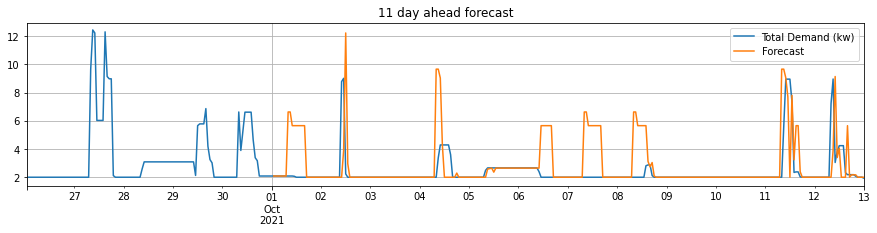

In [291]:
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import mean_absolute_percentage_error as mape
import numpy as np
import matplotlib.pyplot as plt


ground_truth_line = pd.concat([y_train[-5*24:], y_test])

naive_pred = [y_train.to_numpy().tolist()[-1]] + y_test.to_numpy().tolist()[:-1]
print("MAPE naive:", mape(y_test, naive_pred))
print("MAPE:", mape(y_test, y_test_pred_dec_tree))
print("MSE:", mse(y_test, y_test_pred_dec_tree))
print("RMSE:", np.sqrt(mse(y_test, y_test_pred_dec_tree)))

plt.figure()
plot = ground_truth_line.plot(figsize=(15, 3), label='Data', legend=True, title="11 day ahead forecast")
a = pd.Series(y_test_pred_dec_tree)
a.index = pd.Series(y_test['Total Demand (kw)']).index
a.plot(label='Forecast', legend=True)
plot.grid()
plt.show()

In [292]:
y_test['Total Demand (kw)'].to_numpy().shape

(288,)

#### SVM Baseline model

In [293]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

sv_regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
sv_regr.fit(X_train, y_train)

y_train_pred_svr = sv_regr.predict(X_train)
y_test_pred_svr = sv_regr.predict(X_test)

C:\Users\vkarakolis.EPU\Anaconda3\envs\veolia\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [294]:
MSE_test_svr = mean_squared_error(y_test, y_test_pred_svr)

MAPE_test_svr = mean_absolute_percentage_error(y_test, y_test_pred_svr)


print(MSE_test_svr, round(MAPE_test_svr * 100, 2),'%')

0.580380657540172 14.73 %


MAPE naive: 0.05086908189424863
MAPE: 0.1473115181681131
MSE: 0.580380657540172
RMSE: 0.7618271835135394


<Figure size 432x288 with 0 Axes>

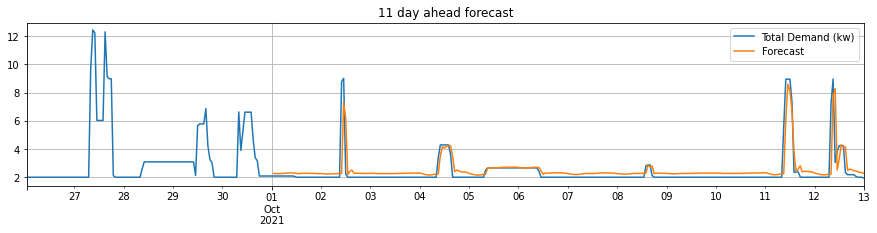

In [295]:
ground_truth_line = pd.concat([y_train[-5*24:], y_test])

naive_pred = [y_train.to_numpy().tolist()[-1]] + y_test.to_numpy().tolist()[:-1]
print("MAPE naive:", mape(y_test, naive_pred))
print("MAPE:", mape(y_test, y_test_pred_svr))
print("MSE:", mse(y_test, y_test_pred_svr))
print("RMSE:", np.sqrt(mse(y_test, y_test_pred_svr)))

plt.figure()
plot = ground_truth_line.plot(figsize=(15, 3), label='Data', legend=True, title="11 day ahead forecast")
a = pd.Series(y_test_pred_svr)
a.index = pd.Series(y_test['Total Demand (kw)']).index
a.plot(label='Forecast', legend=True)
plot.grid()
plt.show()

#### Random forest regression

In [296]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg = rf_reg.fit(X_train, y_train)

y_train_pred_rf = rf_reg.predict(X_train)
y_test_pred_rf = rf_reg.predict(X_test)

<ipython-input-296-156f1dc969f9>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg = rf_reg.fit(X_train, y_train)


In [297]:
MSE_train_rf = mean_squared_error(y_train, y_train_pred_rf)
MSE_test_rf = mean_squared_error(y_test, y_test_pred_rf)

MAPE_train_rf = mean_absolute_percentage_error(y_train, y_train_pred_rf)
MAPE_test_rf = mean_absolute_percentage_error(y_test, y_test_pred_rf)


print(MSE_test_rf, round(MAPE_test_rf * 100, 2),'%')

1.7622653550612442 24.73 %


MAPE naive: 0.05086908189424863
MAPE: 0.2473365349326314
MSE: 1.7622653550612442
RMSE: 1.3275034293971688


<Figure size 432x288 with 0 Axes>

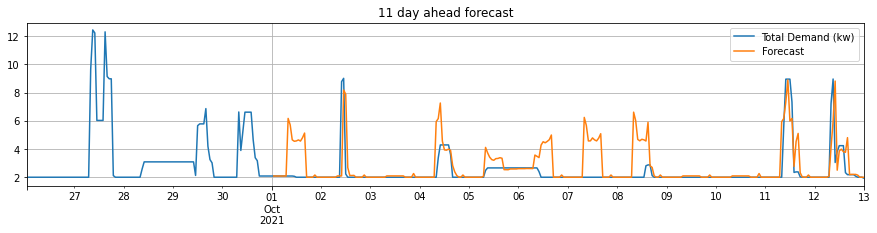

In [298]:
ground_truth_line = pd.concat([y_train[-5*24:], y_test])

naive_pred = [y_train.to_numpy().tolist()[-1]] + y_test.to_numpy().tolist()[:-1]
print("MAPE naive:", mape(y_test, naive_pred))
print("MAPE:", mape(y_test, y_test_pred_rf))
print("MSE:", mse(y_test, y_test_pred_rf))
print("RMSE:", np.sqrt(mse(y_test, y_test_pred_rf)))

plt.figure()
plot = ground_truth_line.plot(figsize=(15, 3), label='Data', legend=True, title="11 day ahead forecast")
a = pd.Series(y_test_pred_rf)
a.index = pd.Series(y_test['Total Demand (kw)']).index
a.plot(label='Forecast', legend=True)
plot.grid()
plt.show()

### XGBoost

In [299]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)

y_test_pred_xgb = xgb_reg.predict(X_test)

In [300]:
MSE_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)

MAPE_test_xgb = mean_absolute_percentage_error(y_test, y_test_pred_xgb)


print(MSE_test_xgb, round(MAPE_test_xgb * 100, 2),'%')

1.8985942121549977 33.03 %


MAPE naive: 0.05086908189424863
MAPE: 0.33026838651507506
MSE: 1.8985942121549977
RMSE: 1.3778948480036486


<Figure size 432x288 with 0 Axes>

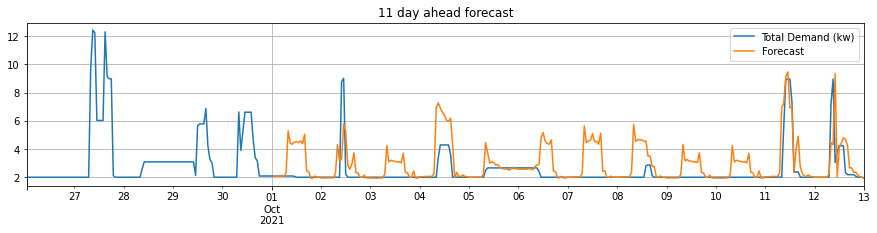

In [301]:
ground_truth_line = pd.concat([y_train[-5*24:], y_test])

naive_pred = [y_train.to_numpy().tolist()[-1]] + y_test.to_numpy().tolist()[:-1]
print("MAPE naive:", mape(y_test, naive_pred))
print("MAPE:", mape(y_test, y_test_pred_xgb))
print("MSE:", mse(y_test, y_test_pred_xgb))
print("RMSE:", np.sqrt(mse(y_test, y_test_pred_xgb)))

plt.figure()
plot = ground_truth_line.plot(figsize=(15, 3), label='Data', legend=True, title="11 day ahead forecast")
a = pd.Series(y_test_pred_xgb)
a.index = pd.Series(y_test['Total Demand (kw)']).index
a.plot(label='Forecast', legend=True)
plot.grid()
plt.show()